# Hierarchical Clustering

This notebook demonstrates Hierarchical Clustering using scikit-learn. Hierarchical clustering builds a tree of clusters using either agglomerative (bottom-up) or divisive (top-down) approaches.

## Algorithm Overview
- Agglomerative: Start with each point as a cluster, merge closest clusters iteratively
- Divisive: Start with all points in one cluster, split recursively
- Results in a dendrogram showing cluster relationships


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Generate Synthetic Dataset


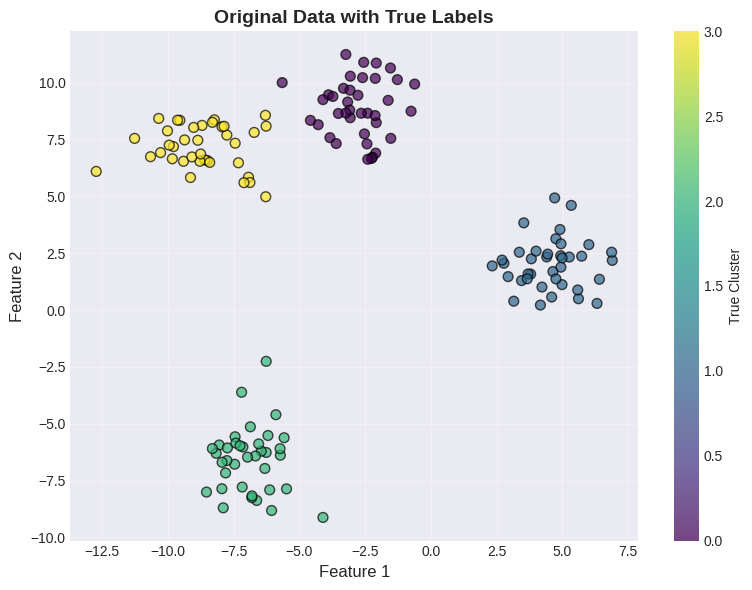

Dataset shape: (150, 2)
Number of clusters: 4


In [2]:
# Generate synthetic dataset
X, y_true = make_blobs(n_samples=150, centers=4, n_features=2,
                       random_state=42, cluster_std=1.2)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('Original Data with True Labels', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of clusters: {len(np.unique(y_true))}")


## Visualize Dendrogram


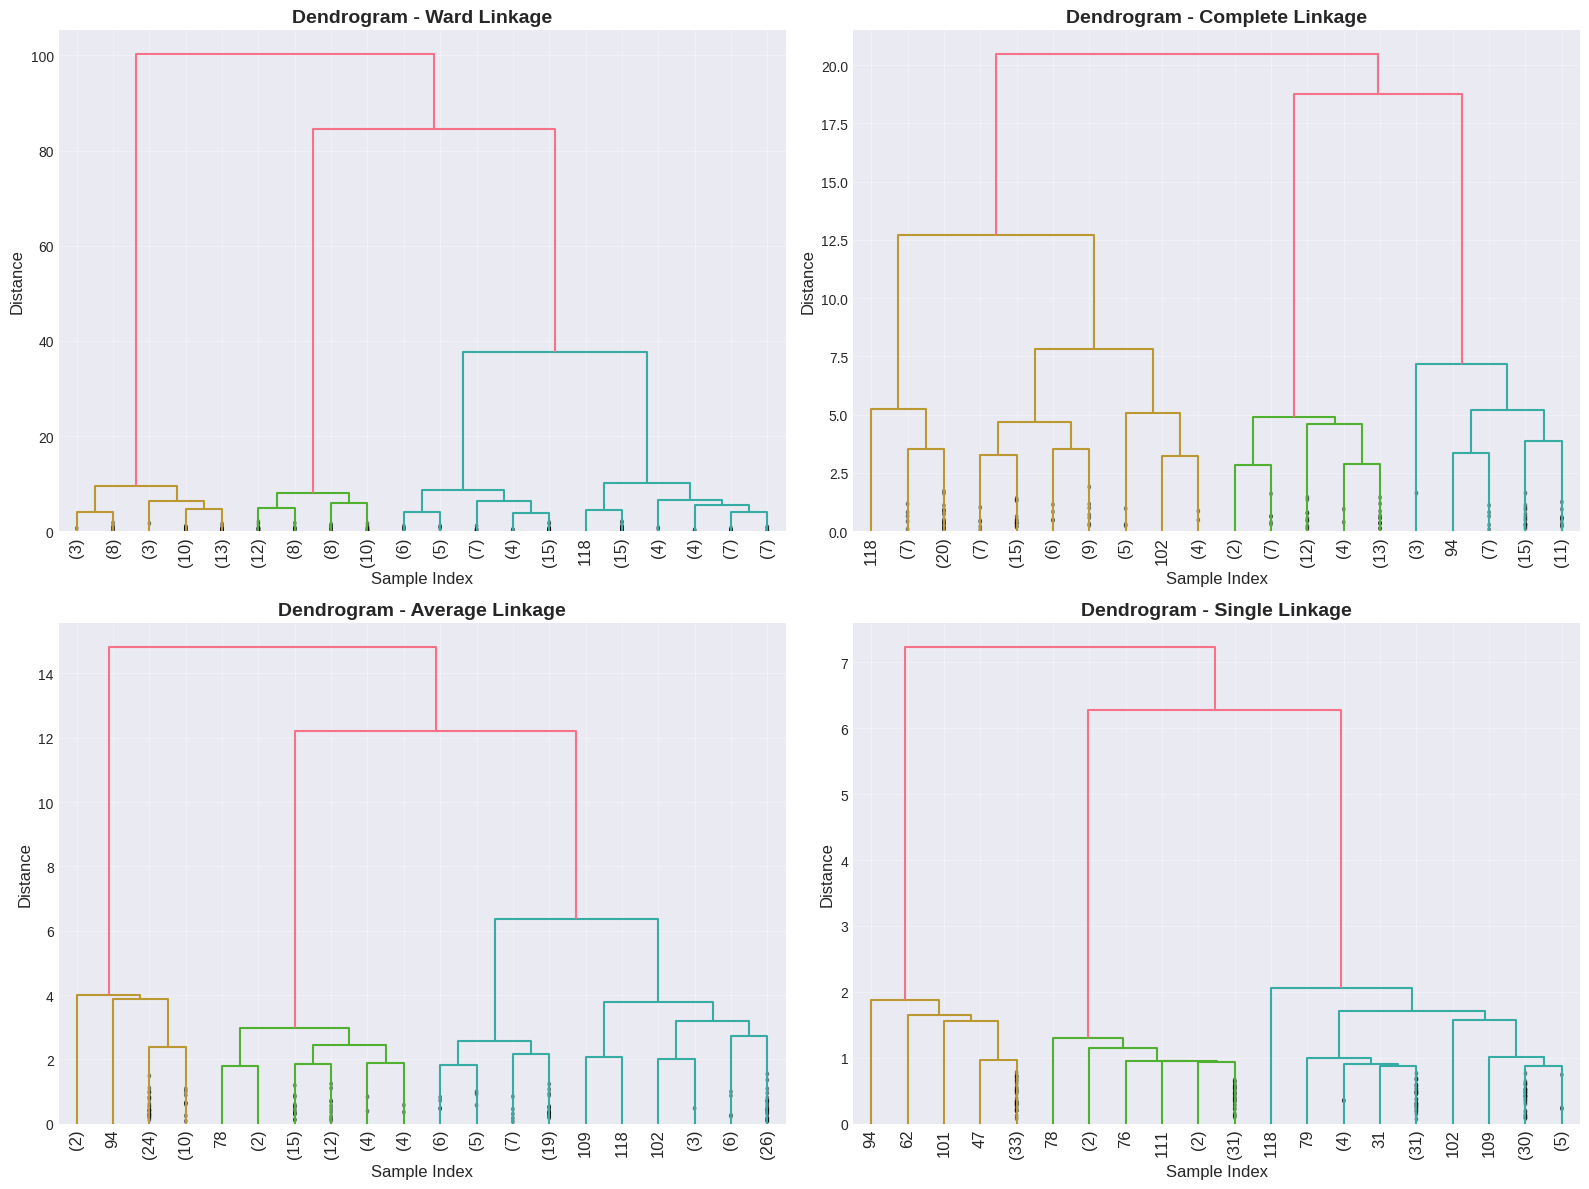

In [3]:
# Create linkage matrix using different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    # Compute linkage matrix
    if method == 'ward':
        Z = linkage(X, method=method, metric='euclidean')
    else:
        Z = linkage(X, method=method, metric='euclidean')

    # Plot dendrogram
    dendrogram(Z, ax=axes[idx], truncate_mode='lastp', p=20,
               leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage',
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Sample Index', fontsize=12)
    axes[idx].set_ylabel('Distance', fontsize=12)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Agglomerative Clustering with Different Linkage Methods


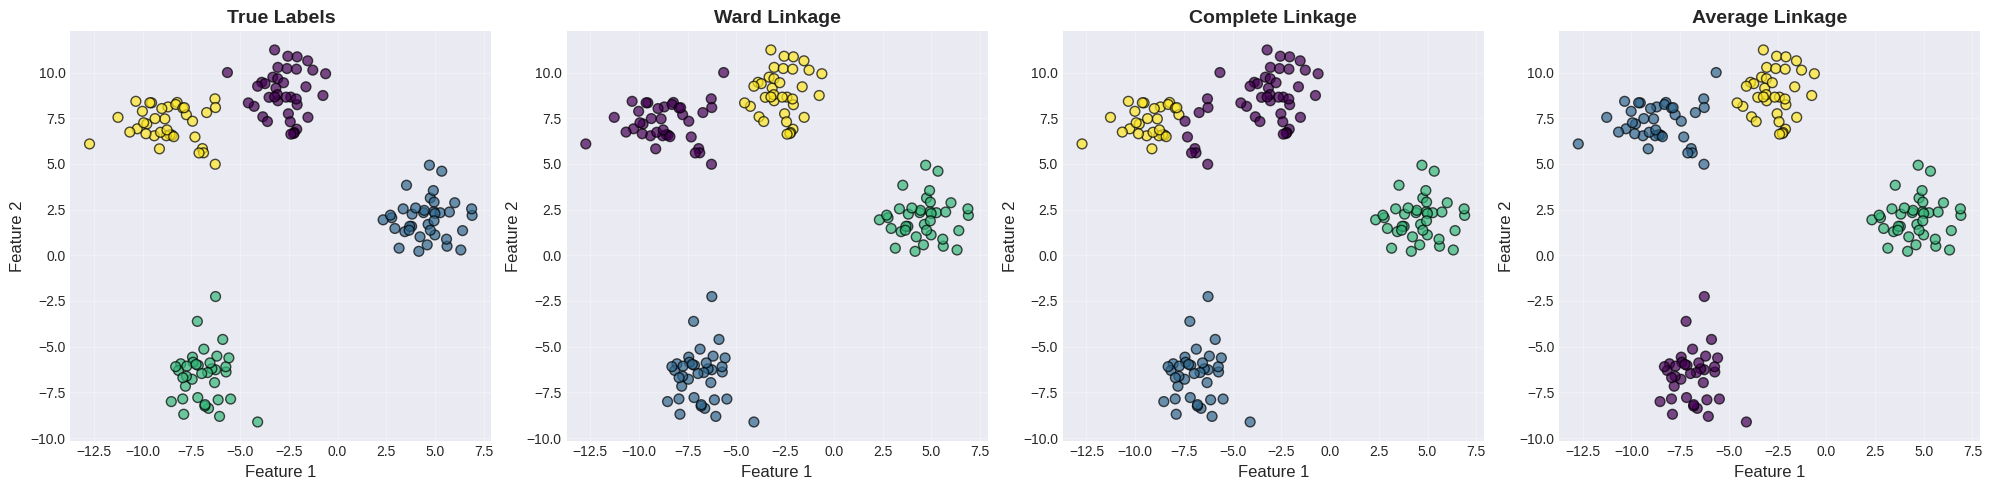

CLUSTERING QUALITY METRICS

WARD LINKAGE:
  Silhouette Score: 0.7348
  Adjusted Rand Index: 0.9821
  Davies-Bouldin Index: 0.3674

COMPLETE LINKAGE:
  Silhouette Score: 0.6866
  Adjusted Rand Index: 0.8579
  Davies-Bouldin Index: 0.4156

AVERAGE LINKAGE:
  Silhouette Score: 0.7348
  Adjusted Rand Index: 0.9821
  Davies-Bouldin Index: 0.3674


In [4]:
# Test different linkage methods
n_clusters = 4
linkage_types = ['ward', 'complete', 'average']

fig, axes = plt.subplots(1, len(linkage_types) + 1, figsize=(20, 5))

# True labels
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('True Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

results = {}

for idx, linkage_type in enumerate(linkage_types):
    # Apply hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_type)
    labels = clustering.fit_predict(X)

    # Visualize
    axes[idx + 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    axes[idx + 1].set_title(f'{linkage_type.capitalize()} Linkage', fontsize=14, fontweight='bold')
    axes[idx + 1].set_xlabel('Feature 1', fontsize=12)
    axes[idx + 1].set_ylabel('Feature 2', fontsize=12)
    axes[idx + 1].grid(True, alpha=0.3)

    # Calculate metrics
    silhouette = silhouette_score(X, labels)
    ari = adjusted_rand_score(y_true, labels)
    db_score = davies_bouldin_score(X, labels)

    results[linkage_type] = {
        'labels': labels,
        'silhouette': silhouette,
        'ari': ari,
        'davies_bouldin': db_score
    }

plt.tight_layout()
plt.show()

# Print metrics
print("=" * 70)
print("CLUSTERING QUALITY METRICS")
print("=" * 70)
for linkage_type, metrics in results.items():
    print(f"\n{linkage_type.upper()} LINKAGE:")
    print(f"  Silhouette Score: {metrics['silhouette']:.4f}")
    print(f"  Adjusted Rand Index: {metrics['ari']:.4f}")
    print(f"  Davies-Bouldin Index: {metrics['davies_bouldin']:.4f}")
print("=" * 70)


## Finding Optimal Number of Clusters


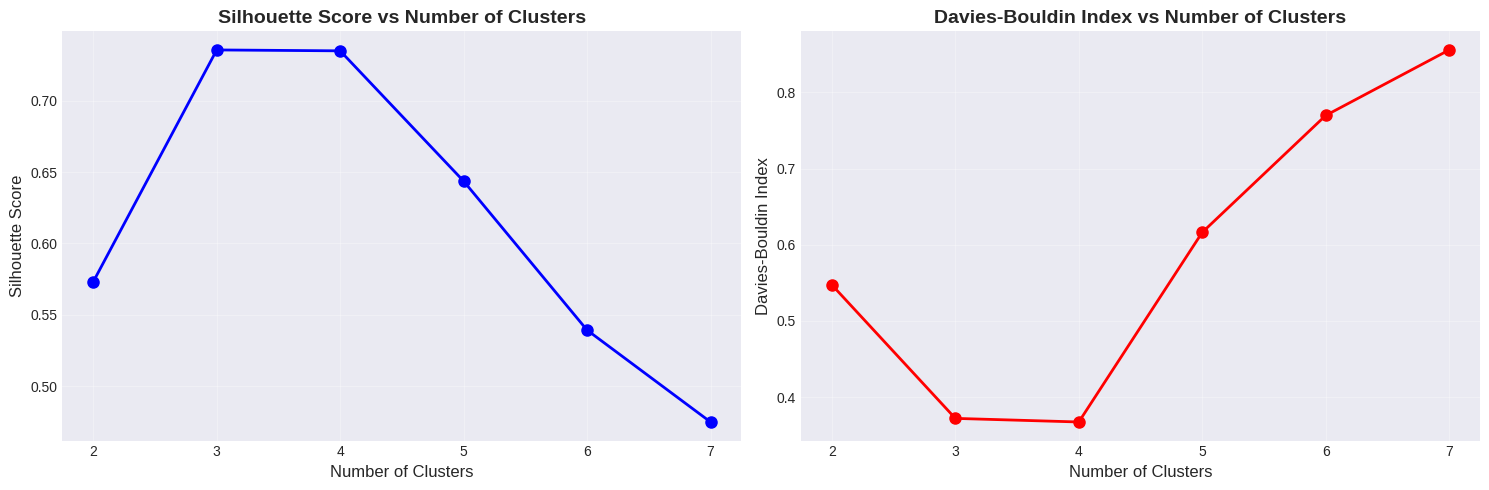

Optimal number of clusters based on silhouette score: 3
Maximum silhouette score: 0.7354


In [5]:
# Test different numbers of clusters
k_range = range(2, 8)
linkage_type = 'ward'  # Using ward linkage

silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_type)
    labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

axes[1].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters', fontsize=12)
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1].set_title('Davies-Bouldin Index vs Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Maximum silhouette score: {max(silhouette_scores):.4f}")


## Real-World Example: Iris Dataset


IRIS DATASET RESULTS
Silhouette Score: 0.4467
Adjusted Rand Index: 0.6153
Davies-Bouldin Index: 0.8035


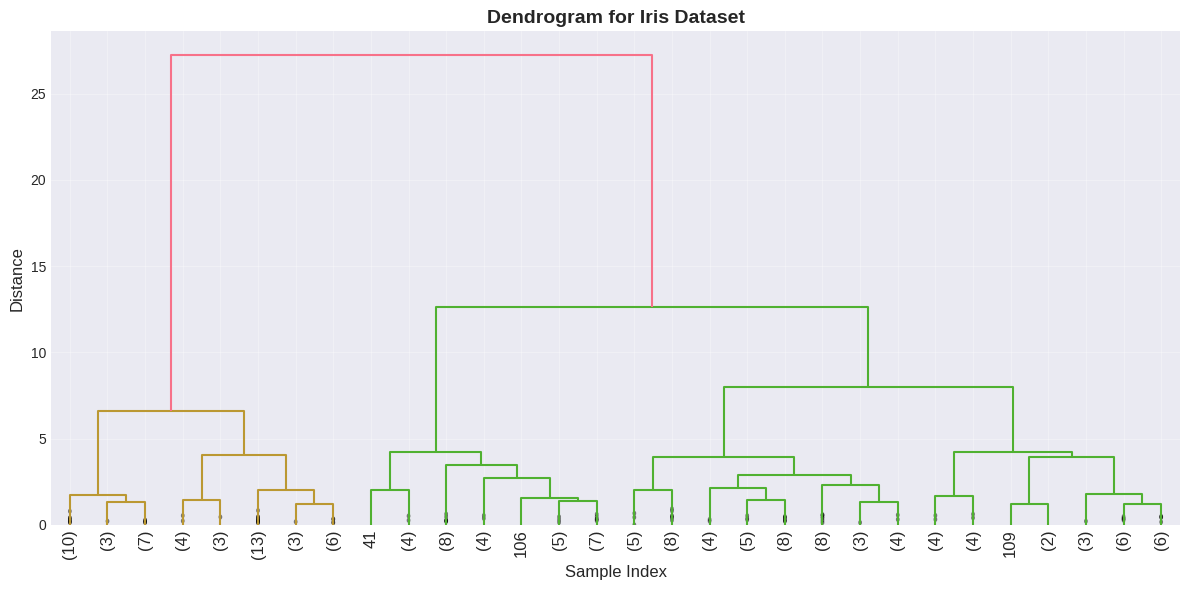

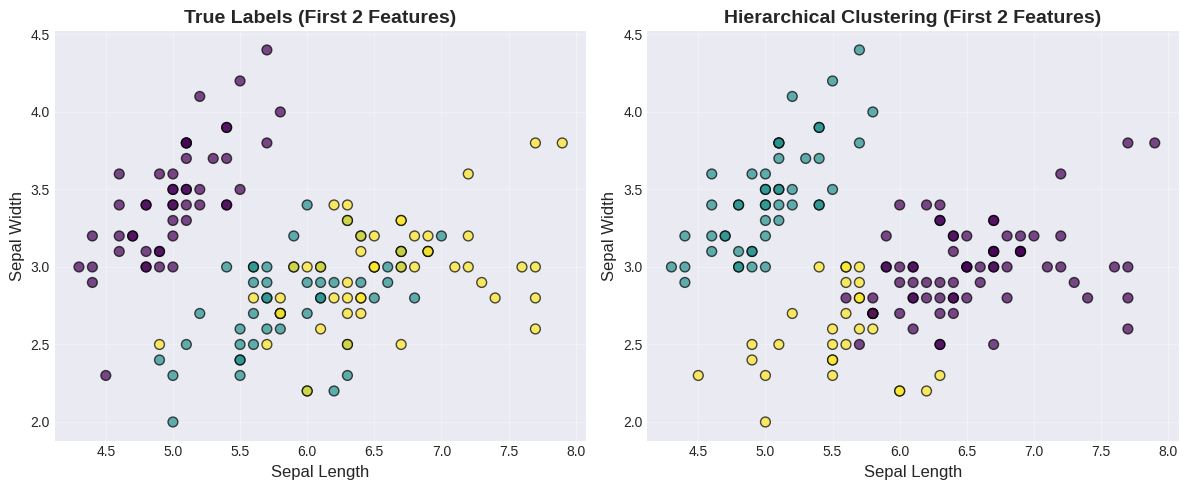

In [6]:
# Load and preprocess Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Apply hierarchical clustering
hierarchical_iris = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_iris_pred = hierarchical_iris.fit_predict(X_iris_scaled)

# Calculate metrics
silhouette_iris = silhouette_score(X_iris_scaled, y_iris_pred)
ari_iris = adjusted_rand_score(y_iris, y_iris_pred)
db_iris = davies_bouldin_score(X_iris_scaled, y_iris_pred)

print("IRIS DATASET RESULTS")
print("=" * 50)
print(f"Silhouette Score: {silhouette_iris:.4f}")
print(f"Adjusted Rand Index: {ari_iris:.4f}")
print(f"Davies-Bouldin Index: {db_iris:.4f}")
print("=" * 50)

# Visualize dendrogram for Iris dataset
plt.figure(figsize=(12, 6))
Z_iris = linkage(X_iris_scaled, method='ward')
dendrogram(Z_iris, truncate_mode='lastp', p=30, leaf_rotation=90.,
          leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Iris Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize clustering results (first 2 features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('True Labels (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('Hierarchical Clustering (First 2 Features)', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Summary

This notebook demonstrated:
1. Hierarchical clustering using scikit-learn's AgglomerativeClustering
2. Different linkage methods (ward, complete, average, single)
3. Dendrogram visualization to understand cluster relationships
4. Evaluation using quality metrics (Silhouette Score, ARI, Davies-Bouldin Index)
5. Finding optimal number of clusters

### Key Takeaways:
- Hierarchical clustering creates a tree of clusters (dendrogram)
- Different linkage methods produce different cluster structures
- Ward linkage minimizes within-cluster variance
- Dendrograms help visualize cluster relationships and choose optimal k
- No need to specify number of clusters beforehand (can cut dendrogram at different levels)
